In [1]:
%load_ext autoreload
%autoreload 2

### Carla tracks explorative data analysis

Main task of this notebook is to get a sense for the carla data.

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.spatial import distance
import xml.etree.ElementTree as ET
from shapely.geometry import Polygon, LineString
import pandas as pd
#from src.generate_traffic_data import clean_carla, spawn_scene, run_scene
import carla
import os
os.getcwd()
from datetime import datetime
import time
import random
from tqdm import tqdm
import networkx as nx
import numpy as np


os.chdir('../..')
os.getcwd()

from graph_creator.MapGraph import MapGraph
from graph_creator.ActorGraph import ActorGraph

In [3]:
# client = carla.Client('localhost', 2000)
# client.set_timeout(10.0)
# world = client.get_world()
# world_map = world.get_map()

### Read map graph and tracks and try to create actor graph.

In [3]:
g_map = MapGraph()
#g = give_it_a_try.create_from_carla_map(world_map)
#g.store_graph_to_file('test.pickle')
#give_it_a_try.visualize_graph()
#g.visualize_graph()
# type(g)
# g.graph.nodes

In [4]:
scn_id = "2025-08-22 22:00:08.700981"

g_map.read_graph_from_file(f'/home/tmuehlen/repos/graph_coverage/carla/data/scene_{scn_id}_map_graph.pickle')


In [5]:
pd.DataFrame(g_map.graph.nodes(data=True))
g_map.graph.nodes(data=True)

NodeDataView({'355_-1': {'node_info': NodeInfo(lane_id='355_-1', is_intersection=True, length=21.92999267578125, lane_polygon=<POLYGON ((144.99 61.493, 167.17 61.491, 167.17 57.491, 144.99 57.493, 144.9...>, left_boundary=None, right_boundary=None)}, '10_-1': {'node_info': NodeInfo(lane_id='10_-1', is_intersection=False, length=157.74000549316406, lane_polygon=<POLYGON ((167.17 61.491, 325.16 61.471, 325.16 57.471, 167.17 57.491, 167.1...>, left_boundary=None, right_boundary=None)}, '354_1': {'node_info': NodeInfo(lane_id='354_1', is_intersection=True, length=21.92999267578125, lane_polygon=<POLYGON ((167.169 53.491, 144.99 53.493, 144.99 57.493, 167.17 57.491, 167....>, left_boundary=None, right_boundary=None)}, '9_1': {'node_info': NodeInfo(lane_id='9_1', is_intersection=False, length=43.34999084472656, lane_polygon=<POLYGON ((144.99 53.493, 101.39 53.499, 101.39 57.499, 144.99 57.493, 144.9...>, left_boundary=None, right_boundary=None)}, '341_1': {'node_info': NodeInfo(lane_id='341_

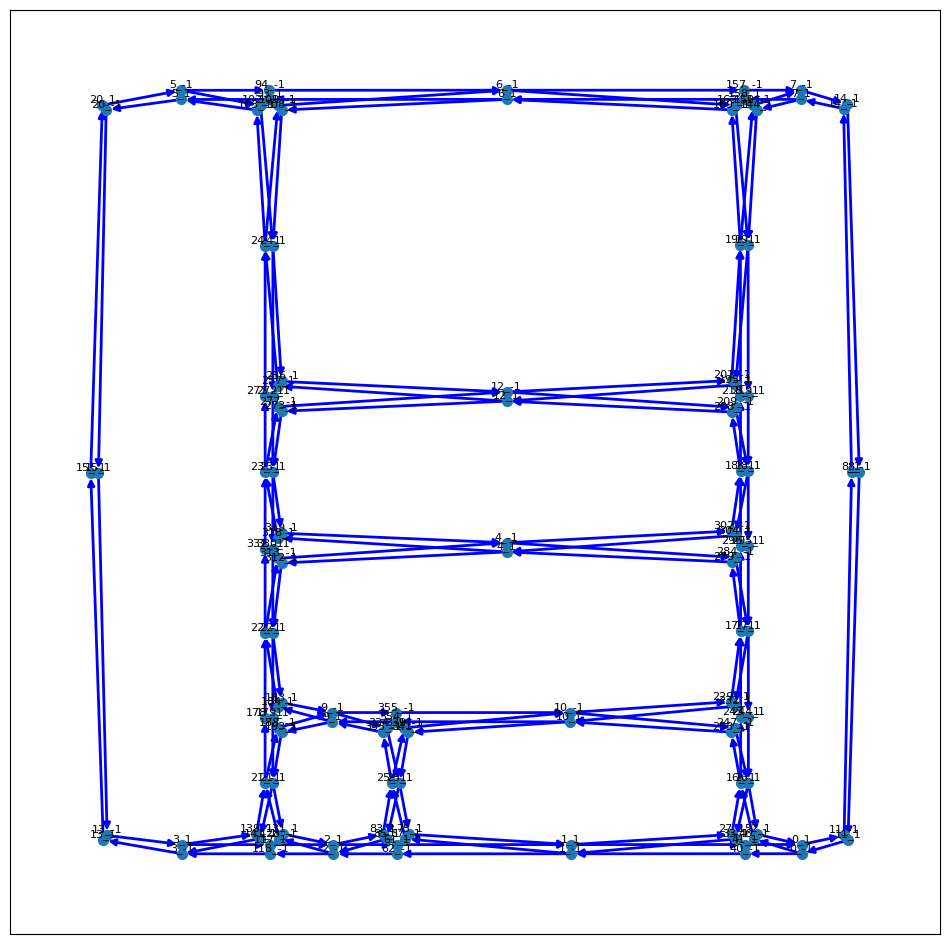

In [7]:
g_map.visualize_graph()

In [6]:
pd.DataFrame(g_map.graph.edges(data=True))


0       1                           2
0    355_-1   10_-1  {'edge_type': 'following'}
1     10_-1  247_-1  {'edge_type': 'following'}
2     10_-1    10_1   {'edge_type': 'opposite'}
3     10_-1    10_1   {'edge_type': 'opposite'}
4     10_-1  229_-1  {'edge_type': 'following'}
..      ...     ...                         ...
243     8_1    8_-1   {'edge_type': 'opposite'}
244   67_-1   25_-1  {'edge_type': 'following'}
245  229_-1   17_-1  {'edge_type': 'following'}
246    41_1     0_1  {'edge_type': 'following'}
247   244_1    16_1  {'edge_type': 'following'}

[248 rows x 3 columns]

In [7]:
tracks = pd.read_parquet(f'/home/tmuehlen/repos/graph_coverage/carla/data/scene_{scn_id}_tracks.parquet')
tracks['road_lane_id'] = tracks.road_id.astype(str) + '_' + tracks.lane_id.astype(str)
print(tracks.shape)

timestamps = tracks.timestamp.unique().tolist()
actors = tracks.actor_id.unique().tolist()
tracks.head(2).T

(70000, 24)


0  \
actor_id                                                                226   
actor_type                                            vehicle.nissan.patrol   
actor_speed_xyz                             [0.0, 0.0, -0.9800000786781311]   
actor_acceleration_xyz                       [0.0, 0.0, -9.800002098083496]   
actor_location_xyz        [1.5099139213562012, 295.4233093261719, 0.2461...   
actor_bbox                [[-2.35963773727417, -0.9656375646591187, 0.00...   
distance_till_lane_end                                           285.212526   
distance_from_lane_start                                              21.75   
t_per_lane_id                                                     -0.502982   
lane_id                                                                   1   
road_id                                                                  15   
carla_road_s                                                     285.463047   
light_state                                                               0   
timestamp                                                            5.5086   
actor_heading_xyz                      [-4.6928735173423775e-06, -1.0, 0.0]   
actor_speed_lon                                                        -0.0   
actor_acceleration_lon                                                 -0.0   
actor_speed_lat                                                         0.0   
actor_acceleration_lat                                                  0.0   
lane_width                                                              4.0   
lane_type                                                                 2   
map                                                   Carla/Maps/Town01_Opt   
scene_id                                         2025-08-22 22:00:08.700981   
road_lane_id                                                           15_1   

                                                                          1  
actor_id                                                                225  
actor_type                                               vehicle.yamaha.yzf  
actor_speed_xyz                             [0.0, 0.0, -0.9800000786781311]  
actor_acceleration_xyz                       [0.0, 0.0, -9.800002098083496]  
actor_location_xyz        [270.94085693359375, 199.05966186523438, 0.246...  
actor_bbox                [[-1.0953842401504517, -0.43295854330062866, 0...  
distance_till_lane_end                                            54.478943  
distance_from_lane_start                                         169.250023  
t_per_lane_id                                                     -0.095001  
lane_id                                                                  -1  
road_id                                                                  12  
carla_road_s                                                     169.521027  
light_state                                                               0  
timestamp                                                            5.5086  
actor_heading_xyz                                           [1.0, 0.0, 0.0]  
actor_speed_lon                                                         0.0  
actor_acceleration_lon                                                  0.0  
actor_speed_lat                                                         0.0  
actor_acceleration_lat                                                  0.0  
lane_width                                                              4.0  
lane_type                                                                 2  
map                                                   Carla/Maps/Town01_Opt  
scene_id                                         2025-08-22 22:00:08.700981  
road_lane_id                                                          12_-1

In [ ]:
tracks.timestamp.nunique()
tracks.timestamp.unique()


array([  5.50859961,   5.55859962,   5.60859962, ..., 105.3586011 ,
       105.4086011 , 105.4586011 ])

In [ ]:
#tracks["timestamp_sec"] = tracks["timestamp"]
#tracks["timestamp"] = tracks.timestamp_sec.rank()
tracks.head(2).T
#

0  \
actor_id                                                                226   
actor_type                                            vehicle.nissan.patrol   
actor_speed_xyz                             [0.0, 0.0, -0.9800000786781311]   
actor_acceleration_xyz                       [0.0, 0.0, -9.800002098083496]   
actor_location_xyz        [1.5099139213562012, 295.4233093261719, 0.2461...   
actor_bbox                [[-2.35963773727417, -0.9656375646591187, 0.00...   
distance_till_lane_end                                           285.212526   
distance_from_lane_start                                              21.75   
t_per_lane_id                                                     -0.502982   
lane_id                                                                   1   
road_id                                                                  15   
carla_road_s                                                     285.463047   
light_state                                                               0   
timestamp                                                            5.5086   
actor_heading_xyz                      [-4.6928735173423775e-06, -1.0, 0.0]   
actor_speed_lon                                                        -0.0   
actor_acceleration_lon                                                 -0.0   
actor_speed_lat                                                         0.0   
actor_acceleration_lat                                                  0.0   
lane_width                                                              4.0   
lane_type                                                                 2   
map                                                   Carla/Maps/Town01_Opt   
scene_id                                         2025-08-22 22:00:08.700981   
road_lane_id                                                           15_1   

                                                                          1  
actor_id                                                                225  
actor_type                                               vehicle.yamaha.yzf  
actor_speed_xyz                             [0.0, 0.0, -0.9800000786781311]  
actor_acceleration_xyz                       [0.0, 0.0, -9.800002098083496]  
actor_location_xyz        [270.94085693359375, 199.05966186523438, 0.246...  
actor_bbox                [[-1.0953842401504517, -0.43295854330062866, 0...  
distance_till_lane_end                                            54.478943  
distance_from_lane_start                                         169.250023  
t_per_lane_id                                                     -0.095001  
lane_id                                                                  -1  
road_id                                                                  12  
carla_road_s                                                     169.521027  
light_state                                                               0  
timestamp                                                            5.5086  
actor_heading_xyz                                           [1.0, 0.0, 0.0]  
actor_speed_lon                                                         0.0  
actor_acceleration_lon                                                  0.0  
actor_speed_lat                                                         0.0  
actor_acceleration_lat                                                  0.0  
lane_width                                                              4.0  
lane_type                                                                 2  
map                                                   Carla/Maps/Town01_Opt  
scene_id                                         2025-08-22 22:00:08.700981  
road_lane_id                                                          12_-1

In [10]:
# tracks["timestamp"] = tracks["timestamp"].astype(int)


In [11]:
ag = ActorGraph()
ag_carla = ag.from_carla_scenario(tracks, g_map, max_distance_lead_veh_m=120)
ag_carla.actor_graphs.keys()

instance.track_lane_dict:  35
instance.track_s_value_dict:  {'226': [21.75, 21.75, 21.75, 21.75, 21.75, 21.75, 21.75, 21.75, 21.75, 21.75, 21.75, 21.75, 21.75, 21.75, 21.75, 21.75, 21.75, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.25, 22.25, 22.25, 22.5, 22.5, 22.75, 22.75, 23.0, 23.25, 23.5, 23.75, 24.0, 24.25, 24.5, 24.75, 25.0, 25.25, 25.5, 25.999969482421875, 26.25, 26.75, 27.0, 27.5, 27.749969482421875, 28.25, 28.499969482421875, 29.0, 29.499969482421875, 30.0, 30.25, 30.75, 31.25, 31.499969482421875, 32.0, 32.5, 32.75, 33.25, 33.5, 34.0, 34.25, 34.75, 35.25, 35.5, 36.0, 36.5, 36.75, 37.25, 37.5, 38.0, 38.5, 38.75, 39.25, 39.5, 40.0, 40.5, 40.75, 41.25, 41.5, 42.0, 42.5, 42.75, 43.25, 43.75, 44.0, 44.5, 44.75, 45.25, 45.75, 46.0, 46.5, 46.75, 47.25, 47.75, 48.0, 48.5, 49.0, 49.25, 49.75, 50.0, 50.5, 51.0, 51.25, 51.75, 52.0, 52.5, 53.0, 53.25, 53.75, 54.25, 54.5, 55.0, 55.25, 55.75, 56.25, 56.5, 57.0, 57.25, 57.75, 58.25, 58.5, 59.0, 59.25, 59.75, 60.25, 60.5, 61.0, 61.5, 61.750015258

dict_keys([5.5085996149573475])

In [ ]:
#ag._create_track_data_carla(tracks)
tracks.actor_type.value_counts()


In [ ]:
tracks.timestamp.value_counts()

In [ ]:
ag_carla.actor_graphs.keys()

In [ ]:
# clean up the graphs and components:

#ag_carla.actor_components[t_idx][i].size()
keys = list(ag_carla.actor_graphs.keys())
for  key in keys:
    ag_carla.actor_components[key] = [ag_carla.actor_components[key][i] for i in range(len(ag_carla.actor_components[key])) if ag_carla.actor_components[key][i].size() > 1]


In [ ]:
pd.DataFrame(ag_carla.actor_graphs[5.5085996149573475].nodes(data=True)).iloc[0,1]


In [ ]:
t_idx = 24
ag_carla.visualize_actor_graph(t_idx = t_idx, comp_idx = 0, use_map_pos=True, node_size = 100, graph_or_component='graph')
for i in range(len(ag_carla.actor_components[t_idx])):
    if ag_carla.actor_components[t_idx][i].size() > 1:
        ag_carla.visualize_actor_graph(t_idx = t_idx, comp_idx = i, use_map_pos=True, node_size = 100, graph_or_component='component')


In [ ]:
tmp = ag_carla._create_track_data_carla(tracks)


In [ ]:
type(tmp)
len(tmp.track_s_value_dict["226"])


### Start comparing graphs:

In [ ]:
t_idx = 24
comp_idx = 2
G1 = ag_carla.actor_components[t_idx][comp_idx]
ag_carla.visualize_actor_graph(t_idx = t_idx, comp_idx = comp_idx, use_map_pos=True, node_size = 100, graph_or_component='component')
t_idx = 2
comp_idx = 1
G2 = ag_carla.actor_components[t_idx][comp_idx]
ag_carla.visualize_actor_graph(t_idx = t_idx, comp_idx = comp_idx, use_map_pos=True, node_size = 100, graph_or_component='component')


In [ ]:
# node statistics:

print('degrees:', G1.degree())



In [ ]:
# graph statistics:
print('density: ', nx.density(G1))
print('diameter: ', nx.diameter(G1))
#print('clustering: ', nx.average_clustering(G))


### graph comparison:

In [ ]:
print('isomorphic:', nx.is_isomorphic(G1, G2)) # actually not meaningful, not what I understood
print('graph edit distsance:', nx.graph_edit_distance(G1, G2))
print('graph edit distsance similarity:', nx.algorithms.similarity.graph_edit_distance(G1, G2))


In [ ]:
GM = nx.algorithms.isomorphism.DiGraphMatcher(G1, G2)
print('isomorphic:', GM.is_isomorphic())
print('subgraph isomorphic:', GM.subgraph_is_isomorphic())

In [ ]:
GM = nx.algorithms.isomorphism.DiGraphMatcher(
    G1, G2,
    node_match=nx.algorithms.isomorphism.categorical_node_match('actor_type', None),
    edge_match=nx.algorithms.isomorphism.categorical_edge_match('edge_type', None)
)

print('isomorphic:', GM.is_isomorphic())
print('subgraph isomorphic:', GM.subgraph_is_isomorphic())

In [ ]:
G1.nodes(data=True)

### Define coverage categories in graphs:

In [ ]:
# most simple: follow lead vehicle:
G = nx.MultiDiGraph()
G.add_node(1, actor_type = 'vehicle')
G.add_node(2, actor_type='vehicle')
G.add_edge(1, 2, edge_type="leading_vehicle")
G.add_edge(2, 1, edge_type="following_lead")

In [ ]:
print(G.nodes(data=True))
print(G.edges(data=True))
print('')
print(G1.nodes(data=True))
print(G1.edges(data=True))
print('')
print(G2.nodes(data=True))
print(G2.edges(data=True))



In [ ]:
GM = nx.algorithms.isomorphism.DiGraphMatcher(
    G2, G,
    node_match=nx.algorithms.isomorphism.categorical_node_match('actor_type', None),
    edge_match=nx.algorithms.isomorphism.categorical_edge_match('edge_type', None)
)

print('isomorphic:', GM.is_isomorphic())
print('subgraph isomorphic:', GM.subgraph_is_isomorphic())

In [ ]:
GM = nx.algorithms.isomorphism.DiGraphMatcher(
    G1, G,
    #node_match=nx.algorithms.isomorphism.categorical_node_match('actor_type', None),
    edge_match=nx.algorithms.isomorphism.categorical_edge_match('edge_type', None)
)

print('isomorphic:', GM.is_isomorphic())
print('subgraph isomorphic:', GM.subgraph_is_isomorphic())

In [ ]:
GM = nx.algorithms.isomorphism.MultiDiGraphMatcher(
    G1, G,
    #node_match=nx.algorithms.isomorphism.categorical_node_match('actor_type', None),
    edge_match=nx.algorithms.isomorphism.categorical_edge_match('edge_type', None)
)

print('isomorphic:', GM.is_isomorphic())
print('subgraph isomorphic:', GM.subgraph_is_isomorphic())

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import isomorphism

# Step 1: Create the host graph G (Directed)
G = nx.DiGraph()
G.add_weighted_edges_from([
    ('A', 'B', 1),
    ('B', 'C', 2),
    ('C', 'D', 3),
    ('A', 'D', 4),
    ('D', 'E', 2),
    ('E', 'F', 1),
])

# Step 2: Create the pattern graph H (Subgraph we're looking for)
H = nx.DiGraph()
H.add_weighted_edges_from([
    ('X', 'Y', 2),
    ('Y', 'Z', 3),
])

# Step 3: Define the edge matcher based on 'weight'
edge_matcher = isomorphism.categorical_edge_match('weight', 0)

# Step 4: Create GraphMatcher with edge attributes
GM = isomorphism.DiGraphMatcher(G, H, edge_match=edge_matcher)

# Step 5: Visualization

# Draw the host graph G
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800, arrows=True)

# Label edge weights
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Highlight matched subgraphs
if GM.subgraph_is_isomorphic():
    print("✅ H is a subgraph of G!\n📌 Matching mappings:")
    for i, mapping in enumerate(GM.subgraph_isomorphisms_iter(), 1):
        print(f"Match {i}: {mapping}")
        
        # Extract edges from the match
        matched_edges = []
        #reverse_map = {v: k for k, v in mapping.items()}
        reverse_mapping = {v: k for k, v in mapping.items()}
        for u, v in H.edges():
            if u in reverse_mapping and v in reverse_mapping:
                source = reverse_mapping[u]
                target = reverse_mapping[v]
                matched_edges.append((source, target))
        
        # Draw matched edges in red
        nx.draw_networkx_edges(G, pos, edgelist=matched_edges, edge_color='red', width=3)

else:
    print("❌ H is NOT a subgraph of G.")

plt.title("Subgraph Isomorphism with Edge Matching")
plt.show()
